In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:

def rbf_fn(X1, X2):
    return np.exp((np.dot(X1,(2*X2.T)) - np.sum(X1*X1,1)[:,None]) - np.sum(X2*X2,1)[None,:])

In [18]:
def k_fn(X1, X2):
    norms = np.sqrt((-np.dot(X1,(2*X2.T)) + np.sum(X1*X1,1)[:,None]) + np.sum(X2*X2,1)[None,:])
    return (1+norms)*np.exp(-norms)


X_grid = np.arange(0, 10, 1)[:,None]
Y_grid = np.arange(5, 15, 1)[:,None]
res = k_fn(X_grid,X_grid)

In [19]:
L_grid = np.linalg.cholesky(res + 1e-12*np.eye(X_grid.shape[0]))

In [22]:
X_grid = np.arange(0, 500, 0.1)[:, None]
N_grid = X_grid.shape[0]
K_grid = k_fn(X_grid, X_grid) + 1e-8*np.eye(N_grid)
L_grid = np.linalg.cholesky(K_grid)
f_grid = np.dot(L_grid, np.random.randn(N_grid))

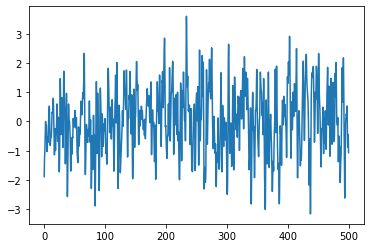

In [23]:
plt.plot(X_grid, f_grid, '-')



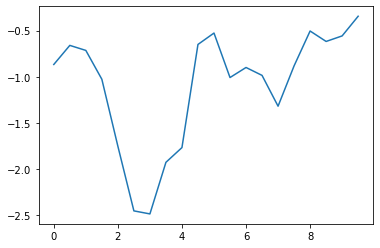

In [59]:
X_grid = np.arange(0, 10, 0.5)[:,None]
N_grid = X_grid.shape[0]
K_grid = k_fn(X_grid, X_grid) + 1e-9*np.eye(N_grid)
L_grid = np.linalg.cholesky(K_grid)
plt.figure(1)
plt.clf()
f_grid = np.dot(L_grid, np.random.randn(N_grid))
plt.plot(X_grid, f_grid, '-')


In [61]:
K = np.empty((N_grid,N_grid))
for i in range(N_grid):
    v = np.column_stack((f_grid[:N_grid-i], f_grid[i:]))
    c = np.cov(v, rowvar=False)
    if i==N_grid-1:
        K[0,i] = np.var(v)
        K[i,0] = np.var(v)
        break
#    print(c.shape)
#    print(i)
#    print(v.shape)
    if i==10:
        pass
    for j in range(N_grid-i):
        K[j,j+i] = c[0,1]
        K[j+i,j] = c[0,1]
        #p +=1

Traceback (most recent call last):
  File "D:\Program Files\JetBrains\PyCharm Professional Edition with Anaconda plugin 2019.2.1\helpers-pro\jupyter_debug\pydev_jupyter_utils.py", line 69, in attach_to_debugger
    debugger.prepare_to_run(enable_tracing_from_start=False)
TypeError: prepare_to_run() got an unexpected keyword argument 'enable_tracing_from_start'
Failed to connect to target debugger.


In [44]:
i=50
v = np.column_stack((f_grid[:N_grid-i], f_grid[i:]))
np.cov(v, rowvar=False)

array([[0.41693643, 0.1484586 ],
       [0.1484586 , 0.45218488]])

In [52]:


np.var(v)

0.08669345278775861